# Linear Regression

The company we are looking at is active in the fashion industry. Customers can visit their stores and get styling advice by professional sellers.
Later they can purchase the fashion pieces they like, either over the companies website or app.

**The Question:** Should the company focus on improving the website or the app? 

**The Task:** Predict which sales channel has the most future potential. This task will be solved using **linear regression**.

Note: All the mail addresses in the data don't actually exist.

In [1]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read the data

customers = pd.read_csv('../input/customersecommerce/Ecommerce_Customers')

## Explore the data

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
sns.set_palette("Dark2")
sns.set_style('whitegrid')

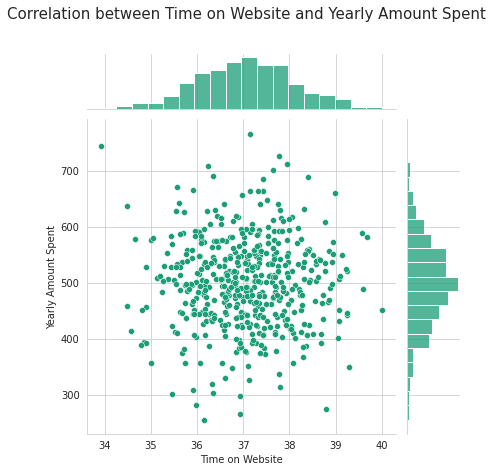

In [7]:
sns.jointplot(data = customers, x = "Time on Website", y = "Yearly Amount Spent")
plt.title("Correlation between Time on Website and Yearly Amount Spent", y=1.3,x = -3, fontsize = 15)
plt.show()

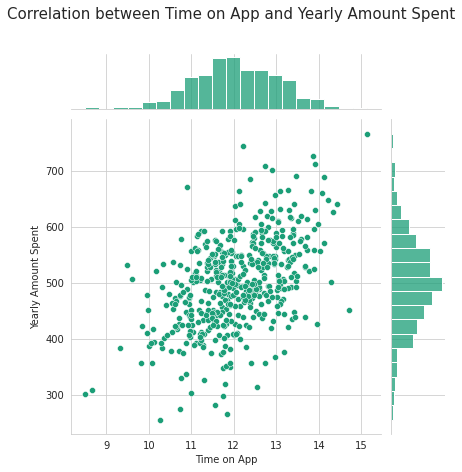

In [8]:
sns.jointplot(data = customers, x = "Time on App", y = "Yearly Amount Spent")
plt.title("Correlation between Time on App and Yearly Amount Spent", y=1.3,x = -3, fontsize = 15)
plt.show()

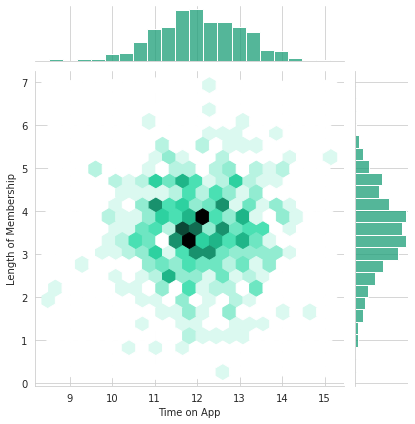

In [9]:
sns.jointplot(data = customers, x= "Time on App", y= "Length of Membership", kind="hex")
plt.show()

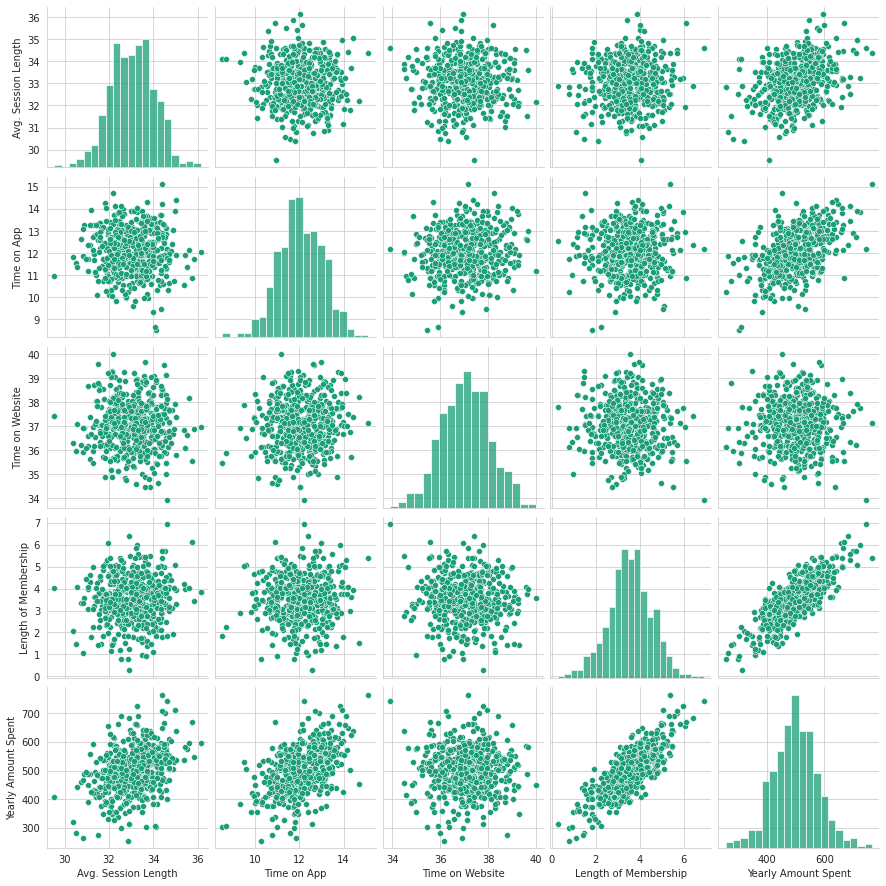

In [10]:
sns.pairplot(customers)
plt.show()

Looks like that especially the Length of the Membership is corellated with the Yearly Amount spent

### Bigger version of this particular plot:

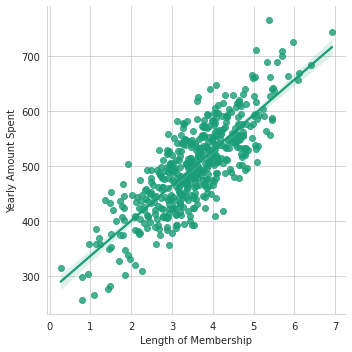

In [11]:
sns.lmplot(data = customers, x = "Length of Membership", y = "Yearly Amount Spent")
plt.show()

## Starting with the Linear Regression 

In [12]:
customers.columns #looking for the numeric columns.

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

'Yearly Amount Spent' will be predicted, so it will be used as the label. The other numeric values are the features.

In [13]:
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

### Training the Model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
print(lm.intercept_) #predicted Value for y if X = 0

-1047.9759648212785


In [20]:
print('Coefficients: \n', lm.coef_) #While holding all other variables stable, increasing a given variable for 1 multiplies the yearly amount spent by the coefficent

Coefficients: 
 [25.91225933 38.50812563  0.28871629 61.16161032]


In [21]:
#Putting the Coefficients in an Dataframe for better understanding

coeff_df = pd.DataFrame(lm.coef_, X.columns)
coeff_df.columns = ['Coefficent']
coeff_df

,Coefficent
Avg. Session Length,25.912259
Time on App,38.508126
Time on Website,0.288716
Length of Membership,61.161610


### Prediciting

In [22]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'X Predicted')

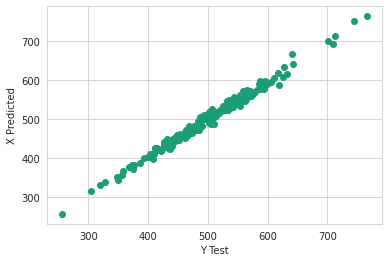

In [23]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('X Predicted')

By just looking at the plot, the prediction of the y_test values looks really good. Apparently this is a solid model. 

### Evaluating the model using MAE, MSE and RMSE

In [24]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.294546588331307
MSE: 81.90726984520914
RMSE: 9.0502635235229


**We got a very good model with a good modelfit**

### Residuals

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

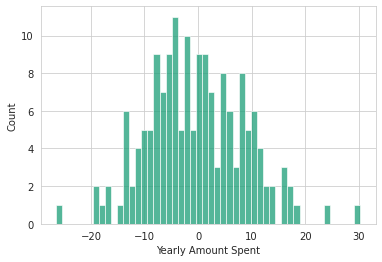

In [25]:
sns.histplot((y_test - predictions), bins = 50)

## Recommended Action for the company 

In [26]:
coeff_df

,Coefficent
Avg. Session Length,25.912259
Time on App,38.508126
Time on Website,0.288716
Length of Membership,61.161610


**Which conclusion can we draw from this?**
* If every other value is constant, an increase of the **Avg. Session Length** by 1 unit leads to an increase of spent Dollars by 25.91
* If every other value is constant, an increase of the **Time on App** by 1 unit leads to an increase of spent Dollars by 38.5
* If every other value is constant, an increase of the **Time on Website** by 1 unit leads to an increase of spent Dollars by 0.289
* If every other value is constant, an increase of the **Length of Membership** by 1 unit leads to an increase of spent Dollars by 61.16

**So to come back to the leading question from the beginning:**
* Currently the App is far more valuable than the Website
* The company could spent more money on the app to make it even more valuable
* The company could spent more money on the website to make it as valuable as the app currently is 
* Apparently also the Length of Membership is very important. There is room for more analysis if there is a connection to the app or website.